# Read Data

In [113]:
import pandas as  pd 

In [114]:
df_fish = pd.read_csv('fish_data.csv')
df_fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [115]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [116]:
df_fish.describe() 

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [117]:
pd.unique(df_fish['species'])

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [118]:
df_fish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

## Label Encoder

In [119]:
from sklearn.preprocessing import LabelEncoder as label_encoder
le = label_encoder()
df_fish['species'] = le.fit_transform(df_fish['species'])
df_fish['species'].value_counts()

species
7    480
0    476
4    475
2    468
5    458
8    455
3    435
6    418
1    415
Name: count, dtype: int64

## Split Atribute

In [120]:
x = df_fish.drop('species', axis=1)
y = df_fish['species'] 

## Scalling

In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x) 
x = scaler.transform(x) 


## Split Train Test

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=22)

## Training Model

In [123]:
from sklearn.linear_model import Perceptron
pcp_model = Perceptron()
pcp_model.fit(x_train, y_train)
pcp_model


Perceptron()

## Predict Test

In [124]:
y_pred = pcp_model.predict(x_test)
y_pred

array([5, 3, 8, 8, 8, 0, 8, 6, 1, 8, 4, 4, 5, 0, 1, 1, 4, 4, 5, 3, 4, 3,
       4, 1, 0, 4, 5, 0, 3, 1, 5, 8, 5, 3, 5, 5, 3, 1, 3, 3, 5, 3, 5, 8,
       0, 8, 5, 0, 4, 8, 8, 3, 1, 3, 6, 5, 3, 3, 3, 3, 3, 4, 6, 3, 3, 4,
       1, 0, 8, 4, 3, 1, 0, 7, 6, 0, 3, 1, 1, 3, 6, 1, 3, 5, 4, 8, 3, 8,
       0, 3, 1, 1, 0, 3, 0, 3, 3, 8, 3, 3, 3, 3, 5, 8, 0, 6, 6, 8, 0, 5,
       0, 4, 3, 3, 3, 4, 3, 6, 4, 8, 3, 8, 6, 3, 5, 3, 6, 0, 6, 0, 3, 8,
       6, 8, 0, 7, 8, 0, 6, 6, 1, 3, 3, 3, 6, 6, 8, 8, 3, 0, 4, 6, 1, 3,
       0, 1, 3, 6, 0, 8, 4, 0, 4, 0, 3, 0, 6, 6, 8, 3, 8, 6, 6, 3, 4, 3,
       0, 8, 0, 3, 1, 0, 8, 8, 4, 8, 0, 6, 3, 8, 4, 1, 4, 1, 3, 0, 8, 3,
       0, 3, 6, 3, 4, 3, 3, 0, 1, 1, 6, 5, 8, 3, 3, 0, 8, 6, 3, 3, 3, 5,
       5, 8, 3, 6, 8, 5, 1, 8, 8, 5, 1, 1, 3, 0, 0, 4, 4, 8, 5, 3, 0, 1,
       3, 6, 4, 6, 8, 5, 3, 8, 3, 8, 8, 1, 1, 0, 3, 5, 3, 3, 0, 6, 4, 4,
       8, 6, 1, 4, 0, 5, 0, 3, 0, 0, 3, 8, 3, 5, 5, 8, 8, 3, 3, 3, 5, 5,
       3, 4, 3, 8, 5, 4, 1, 4, 0, 8, 1, 3, 3, 5, 6,

## Acurate

In [125]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

accuracy = accuracy_score(y_test, y_pred)  
report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Akurasi Model:", accuracy)  
print("\nLaporan Klasifikasi:\n", report)

Akurasi Model: 0.7238562091503268

Laporan Klasifikasi:
                         precision    recall  f1-score   support

    Anabas testudineus       0.86      1.00      0.92        77
     Coilia dussumieri       1.00      1.00      1.00        62
Otolithoides biauritus       0.00      0.00      0.00        68
     Otolithoides pama       0.24      0.61      0.34        62
     Pethia conchonius       0.95      1.00      0.97        70
  Polynemus paradiseus       1.00      0.81      0.89        68
  Puntius lateristriga       0.98      0.90      0.94        67
        Setipinna taty       0.60      0.05      0.09        60
 Sillaginopsis panijus       0.74      1.00      0.85        78

              accuracy                           0.72       612
             macro avg       0.71      0.71      0.67       612
          weighted avg       0.71      0.72      0.68       612



/home/nasssdragon/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nasssdragon/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nasssdragon/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

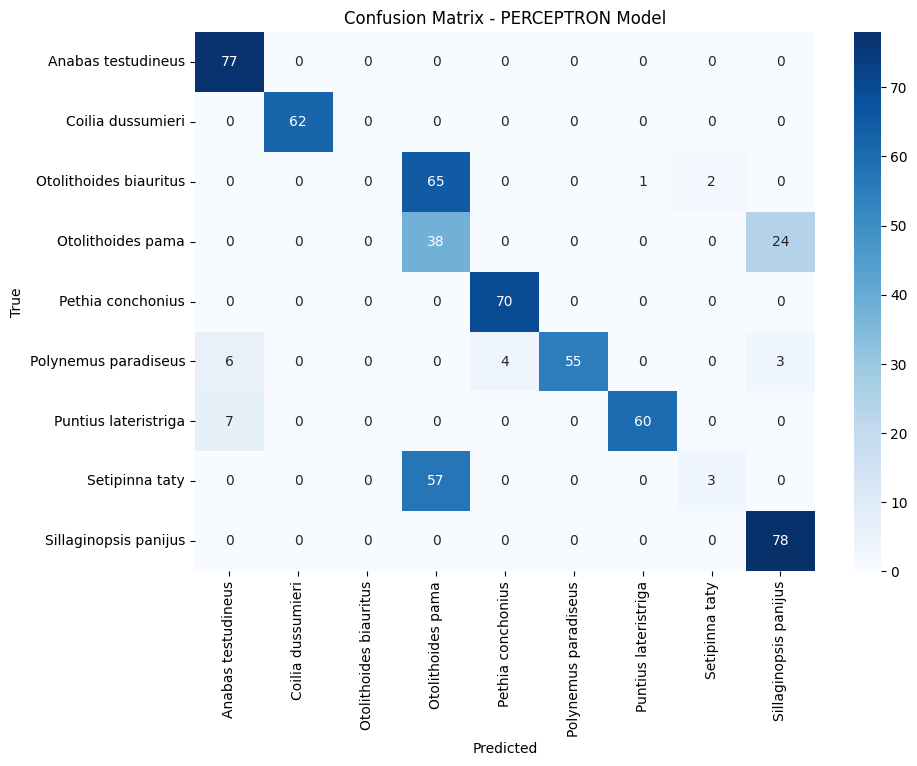

In [126]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pcp_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(pcp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - PERCEPTRON Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/tmp/ipykernel_7066/3548483065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=le.classes_, y=pcp_cm.diagonal(), palette="viridis")


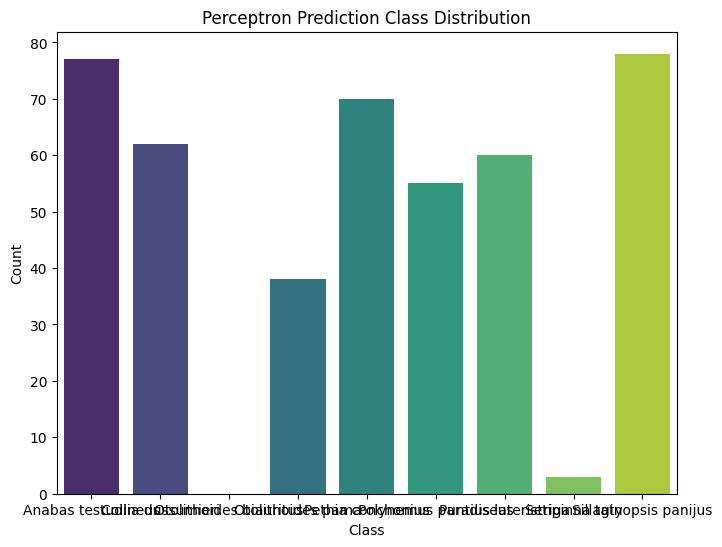

In [127]:
plt.figure(figsize=(8, 6))
sns.barplot(x=le.classes_, y=pcp_cm.diagonal(), palette="viridis")
plt.title("Perceptron Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## New Data

In [128]:
new_data = pd.DataFrame({
    'length': [7.7, 30.1],  
    'weight': [3.38, 350],    
    'w_l_ratio': [0.44, 0.75] 
}) 
new_predictions = pcp_model.predict(new_data)
new_species = le.inverse_transform(new_predictions)
for i, species in enumerate(new_species):
    print(f"Data baru {i+1}: Prediksi species = {species}")
new_predictions

Data baru 1: Prediksi species = Coilia dussumieri
Data baru 2: Prediksi species = Polynemus paradiseus


/home/nasssdragon/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


array([1, 5])

### Dump

In [129]:
import pickle

with open('model_pcp_fish.pkl', 'wb') as file:
    pickle.dump(pcp_model, file)

with open('label_encoder_fish.pkl', 'wb') as file:
    pickle.dump(le, file)
